## Importations les bibliothèques 

In [1]:
!!pip install charset_normalizer

['Requirement already satisfied: charset_normalizer in c:\\users\\j_aka\\anaconda3\\envs\\statistique\\lib\\site-packages (3.3.2)']

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\j_aka\anaconda3\envs\statistique\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## définitions des chemins 

In [3]:
train_ch = r"C:\Users\j_aka\Desktop\DL Project\seg_train\seg_train"
#val_ch = r"C:\Users\j_aka\Desktop\DL Project\seg_pred\seg_pred" 
test_ch = r"C:\Users\j_aka\Desktop\DL Project\seg_test\seg_test"

### Définition de paramètres

In [4]:
img_size = (150,150)
batch_size = 32

## Charger les données

### Train et Val

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_ch,
    validation_split=0.2,
    subset="training",
    image_size=img_size,
    batch_size=batch_size,
    seed=125,
    #shuffle=True
    )
train_ds=train_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_ch,
    validation_split=0.2,
    subset="validation",
    image_size=img_size,
    batch_size=batch_size,
    seed=125,
    #shuffle=False
    )
val_ds=val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


### Test

In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_ch,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False 
)
test_ds  = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3000 files belonging to 6 classes.


## Normalisation 

In [7]:
normalisation_layer = tf.keras.layers.Rescaling(1./255)
train_ds=train_ds.map(lambda x,y:(normalisation_layer(x),y))
val_ds=val_ds.map(lambda x,y:(normalisation_layer(x),y))
test_ds=test_ds.map(lambda x,y:(normalisation_layer(x),y))

## Augmentation de la donnée 

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),        
    tf.keras.layers.RandomRotation(0.1),            
    tf.keras.layers.RandomZoom(0.1),                
    tf.keras.layers.RandomContrast(0.2),             
])


### Visualisation 

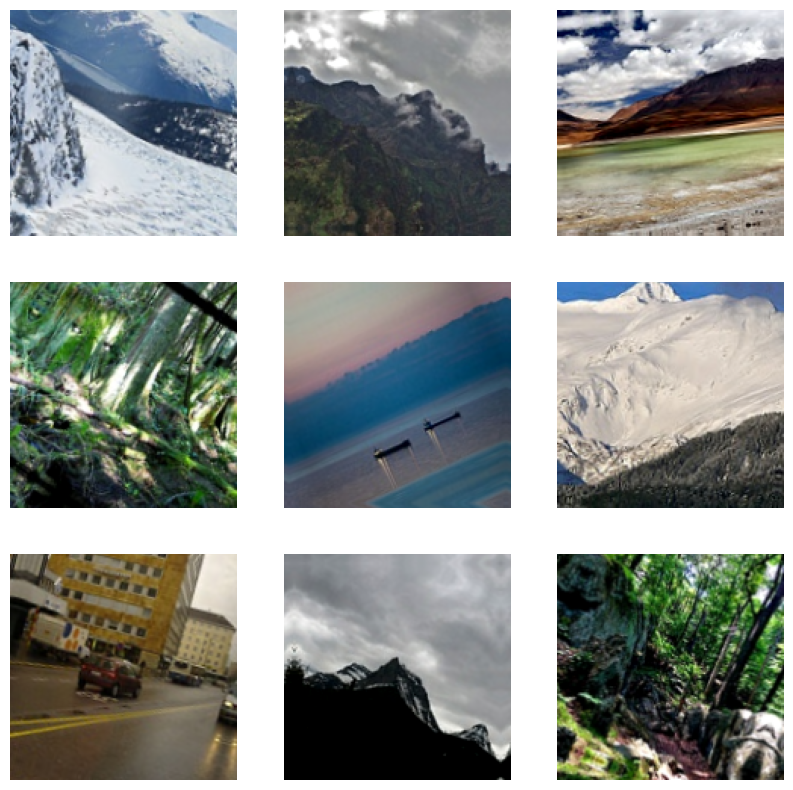

In [9]:
# Visualiser 9 images augmentées
for images, labels in train_ds.take(1):  # prend 1 batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        # Applique l'augmentation
        augmented_image = data_augmentation(images)[i].numpy()
        # Assure que toutes les valeurs sont entre 0 et 1
        augmented_image = tf.clip_by_value(augmented_image, 0, 1)
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image)
        plt.axis("off")
    plt.show()

## Construction modèle 

In [ ]:
model= Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  MaxPooling2D((2,2)),
  Dropout(0.5),

  Conv2D(64, (3,3), activation='relu'), 
  MaxPooling2D((2,2)),
  Dropout(0.5),

  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Dropout(0.5),

  Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')

])

c:\Users\j_aka\anaconda3\envs\statistique\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entrainement du modèle

In [11]:
model.compile(
    optimizer= Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)
early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=5,                
    restore_best_weights=True 
)


Epoch 1/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 113s 312ms/step - accuracy: 0.5712 - loss: 1.0864 - val_accuracy: 0.6981 - val_loss: 0.8142
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 275ms/step - accuracy: 0.7061 - loss: 0.8020 - val_accuracy: 0.7498 - val_loss: 0.7041
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 106s 301ms/step - accuracy: 0.7725 - loss: 0.6404 - val_accuracy: 0.8207 - val_loss: 0.5140
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 90s 256ms/step - accuracy: 0.8088 - loss: 0.5358 - val_accuracy: 0.7990 - val_loss: 0.5921
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 103s 293ms/step - accuracy: 0.8372 - loss: 0.4567 - val_accuracy: 0.8286 - val_loss: 0.5242
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 99s 282ms/step - accuracy: 0.8679 - loss: 0.3701 - val_accuracy: 0.8336 - val_loss: 0.5494
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.8847 - loss: 0.3209 - val_accuracy: 0.8329 - val_loss: 0.5287
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 100s 285ms/step - accuracy: 0.9044 - los